#UBER SUPPLY DEMAND GAP
####Business Objectives
The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

####Data Understanding
There are six attributes associated with each request made by a customer:

Request id: A unique identifier of the request.

Time of request: The date and time at which the customer made the trip request.

Drop-off time: The drop-off date and time, in case the trip was completed.

Pick-up point: The point from which the request was made.

Driver id: The unique identification number of the driver.

Status of the request: The final status of the trip, that can be either completed, cancelled by the driver or no cars available

Note: For this assignment, only the trips to and from the airport are being considered.

####Data Cleaning and Preparation - Hints

Identify the data quality issues and clean the data so that you can use it for analysis.

Ensure that the dates and time are in the proper format. Derive new variables which will be useful for analysis.

####Results Expected
Visually identify the most pressing problems for Uber.

Hint: Create plots to visualise the frequency of requests that get cancelled or show 'no cars available';
identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

Find out the gap between supply and demand and show the same using plots.

Find the time slots when the highest gap exists.

Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots.

What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).

Recommend some ways to resolve the supply-demand gap.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import io

Reading the data from th dataset

In [0]:
uber = pd.read_csv('Uber Request Data.csv')

The contents of the data set

In [0]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


The number of rows being the number of datas and number of columns

In [0]:
uber.shape

(6745, 6)

In [0]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


Describing the data 

In [0]:
uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


Checking for the duplicate values in the data set

In [0]:
len(uber[uber.duplicated()].index)

0

Inspecting the null values in the dataset

In [0]:
uber.isnull().sum(axis=0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Describing the number of drivers compared to total demands and completed number of trips per day

In [0]:
count = pd.DataFrame({'No.of Drivers':[uber['Driver id'].nunique()], 
                      'DemandPerDay':[uber['Request id'].nunique()/5],
                      'Trips Completed Per Day':uber[(uber['Status']=='Trip Completed')].shape[0]/5})
count

,No.of Drivers,DemandPerDay,Trips Completed Per Day
0,300,1349.0,566.2


Driver who has the maximum number of trips

In [0]:
drivermax = uber['Driver id'].value_counts()
print("The driver id: ", drivermax.index[0], "  number of trips:", drivermax.iloc[0]);

The driver id:  27.0   number of trips: 22


Calculating the average for the number of demands to the available drivers

In [0]:
avg=count['DemandPerDay']/count['No.of Drivers']
avg

0    4.496667
dtype: float64

Frequency of status

Request and drop time is formatted to time format

In [0]:
uber["Request timestamp"] = pd.to_datetime(uber["Request timestamp"], dayfirst=True)
uber["Drop timestamp"] = pd.to_datetime(uber["Drop timestamp"], dayfirst=True)
uber['Request_Weekday'] = uber['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
uber['Request_Hour'] = uber['Request timestamp'].apply(lambda x: x.hour)

In [0]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Weekday,Request_Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,Wednesday,8


In [0]:
uber['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

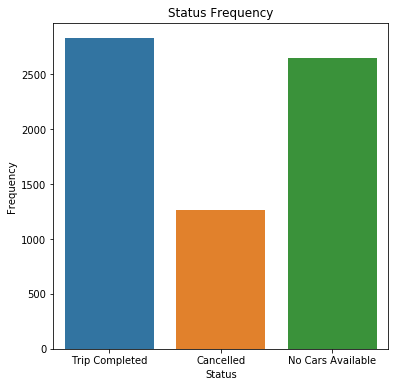

In [0]:
plt.figure(figsize=(6,6))
sns.countplot(x=uber['Status'])
sns.set_style("dark")
plt.title("Status Frequency")
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.show()

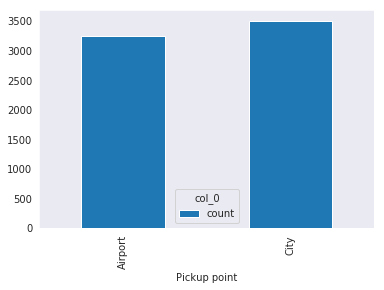

In [0]:
pick_pnt = pd.crosstab(index = uber["Pickup point"], columns="count")     
pick_pnt.plot.bar()

Plot for day with respect to Weekday

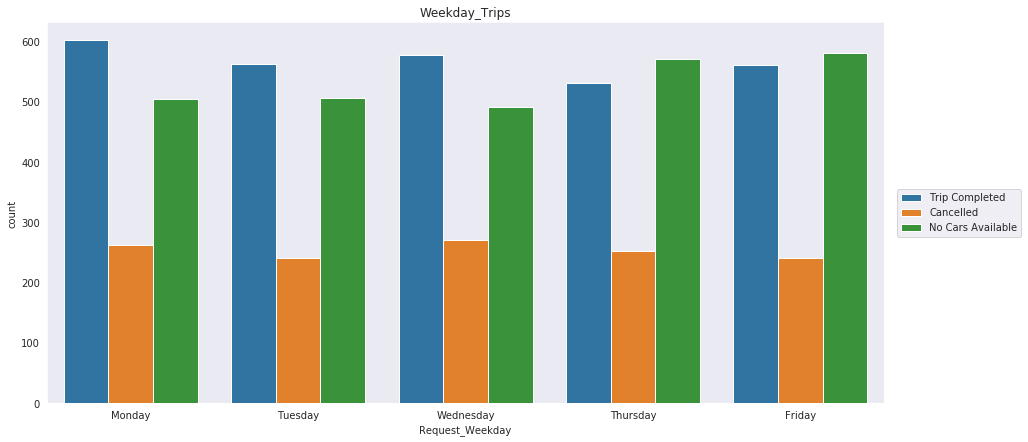

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday_Trips")
ax = sns.countplot(x='Request_Weekday',hue='Status',data=uber)
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

 Extract hour from request timestamp.
 Extract hour from drop timestamp.
 
####Plot of hour and day with respect to status

In [0]:

rqhour = uber["Request timestamp"].dt.hour
rqhour.head()
rqhour.value_counts()
uber["rqhour"] = rqhour

rqday = uber["Request timestamp"].dt.day
rqday.head()
rqday.value_counts()
uber["rqday"] = rqday

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


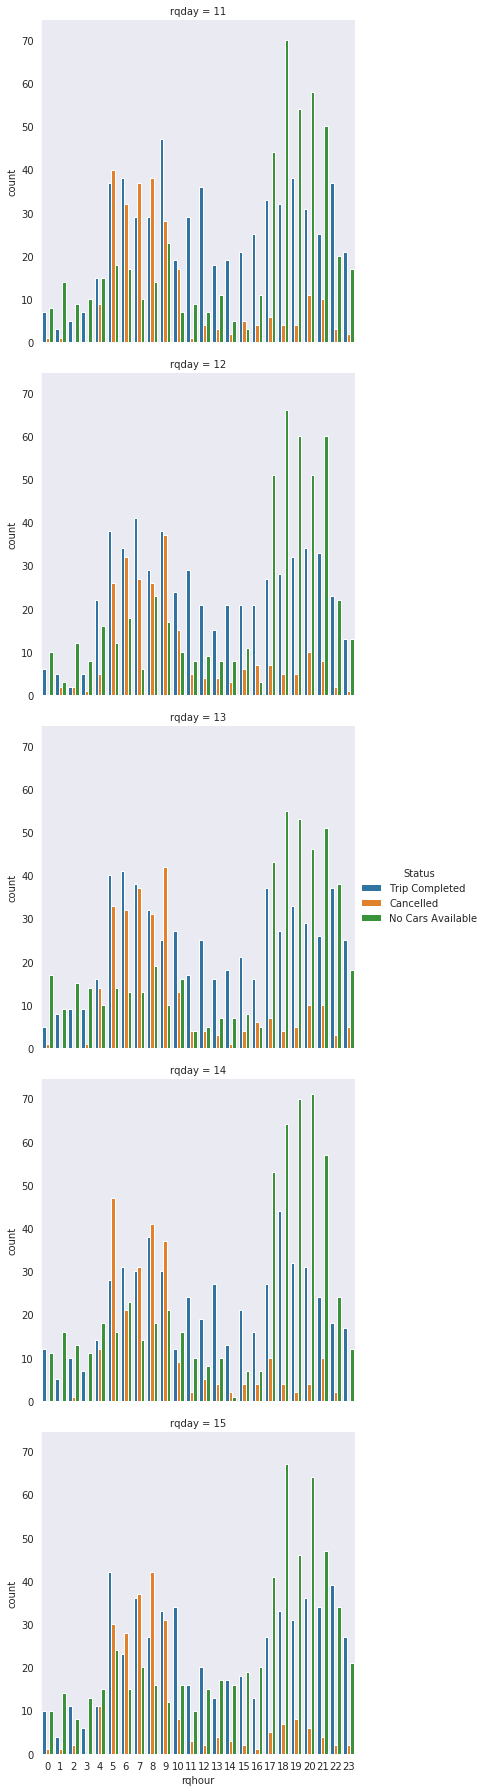

In [0]:

sns.factorplot(x = "rqhour", hue = "Status", row = "rqday", data = uber, kind = "count")

Plot indicating the availability and complition of trips in both airport and city

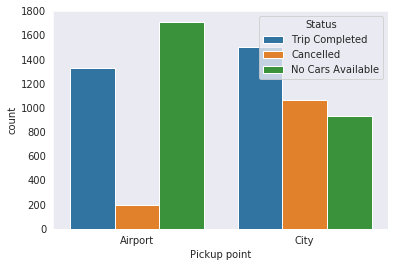

In [0]:
sns.countplot(x=uber['Pickup point'],hue =uber['Status'] ,data = uber)

The gap between the demand and supply in both airport and city


In [0]:

uber['Demand'] = 1
uber['Supply'] = 0
uber.loc[(uber['Status'] == 'Trip Completed'),'Supply'] = 1

uber['Gap'] = uber['Demand'] - uber['Supply']
gap_pickup_df = pd.DataFrame(uber.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))


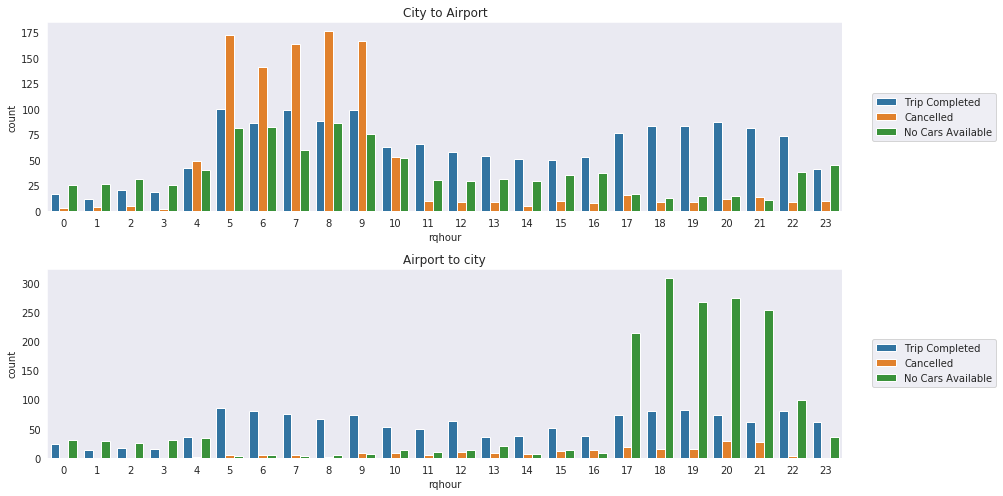

In [0]:
city = uber[uber['Pickup point']=="City"]
airport = uber[uber['Pickup point']=="Airport"]
f = plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.title("City to Airport")
sns.countplot(x='rqhour',hue='Status',data=city)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.subplot(2,1,2)
plt.title("Airport to city")
sns.countplot(x='rqhour',hue='Status',data=airport)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.tight_layout()

####Conclusion
In the morning period the number of cars can be increased from airport to city so that the number of cars for city to airport cancellation can be reduced.

Start directing cabs from city towards the airport starting late afternoon to increase supply at the high demand hours of evening and night